# Laser Sensor Outdoor Tests

## Objective

The objective of this notebook is to determine the sensor's effectiveness in detecting and measuring the distances of vehicles in a real-world setting.

## Overview

First, I mounted the sensor on a stationary bike and positioning it along a busy road to test its ability to detect passing vehicles. Next, with the same set up, the bike was cycled down different roads and the data from overtaking vehicles was collected. I wanted to first test the sensor in a more controlled setting before applying it in a more dynamic environment.

### Code

To prevent this notebook from being cluttered, I have split some of the code into separate Python modules found in the same directory.

- [`data.py`](./data.py) helps to load data measured by the sensor.
- [`graphing.py`](./graphing.py) helps to graph the data for comparison.
- [`preprocessing.py`](./preprocessing.py) helps to preprocess the data.

In [1]:
import pathlib

import matplotlib.pyplot as plt

from data import DataLoader
from graphing import OutdoorGraphs
from preprocessing import DataCleaner

## Stationary Test

In the first test, the sensor was mounted on a stationary bike along Yuan Ching Rd. which saw moderate traffic. I also mounted a Go Pro to capture a video of the vehicles that passed the bike. I cross referenced the data collected from the sensor and the Go Pro's video feed to determine the reliability of the sensor.

### Setup

- I first define the paths to my data and initialize my modules.

In [2]:
STATIONARY_PATH = pathlib.Path("./data/laser_outdoor_tests/yuan_ching_rd.txt")

data_loader = DataLoader()
graphs = OutdoorGraphs()
data_cleaner = DataCleaner()

- I extract the raw data into three lists: times, distances measured, and signal strength.
- Because the laser sensor measures up to 100m, I filter out all points above 3.5m.

In [3]:
timing, distances, strengths = data_loader.load_data_from_file(STATIONARY_PATH)
distances = data_cleaner.fliter_above(distances, 3500)

### Raw Data

- Because the sensor measures up to 100m, I cleaned out data above 3.5m for the scatter plot below.
- Unlike the TOF sensor, the laser sensor barely produced any spurious data, and was a lot more accurate and precise.
- However, despite advertising its frequency as 20Hz, the actualy frequency was inconsistent and slow, averaging below 10Hz and was therefore unable to capture all the vehicles that passed.

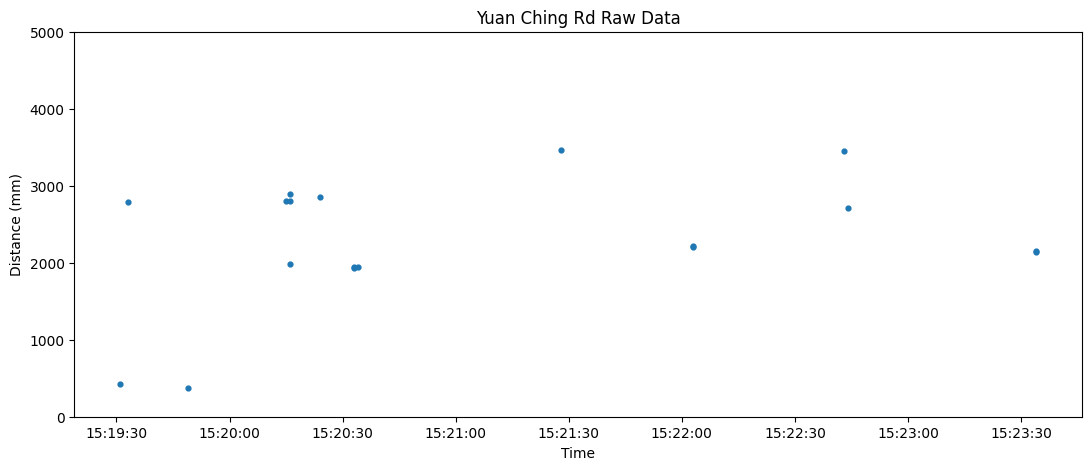

In [4]:
fig, axes = plt.subplots(figsize=(13, 5))
graphs.scatter_time_vs_distance(axes, timing, distances, title="Yuan Ching Rd Raw Data")
plt.show()